In [2]:
import pickle
import os
import nltk

In [3]:
# directory='/Users/javeria/Desktop/thesis-finalyear/speeches'
# for filename in os.listdir(directory):
#     if filename.endswith(".txt"): 
#         print(filename)
#         with open(filename+".txt", 'rb') as file:
#             data = file.read()
#         with open("transcripts/"+filename+".txt", "wb") as file:
#             pickle.dump(data, file)
#         continue


### STEP1: COLLECT DATA

In [4]:
data=[]
directory='/Users/javeria/Desktop/thesis-finalyear/speeches'
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        with open(directory+"/"+filename, 'r') as file:
            data.append(file.read().replace("\n", " "))
        file.close()
        continue

In [5]:
data

[' President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board, and graduates of the greatest university in the world, I\'m honored to be with you today because, let\'s face it, you accomplished something I never could. If I get through this speech, it\'ll be the first time I actually finish something at Harvard. Class of 2017, congratulations! I\'m an unlikely speaker, not just because I dropped out, but because we\'re technically in the same generation. We walked this yard less than a decade apart, studied the same ideas and slept through the same Ec10 lectures. We may have taken different paths to get here, especially if you came all the way from the Quad, but today I want to share what I\'ve learned about our generation and the world we\'re building together. But first, the last couple of days have brought back a lot of good memories. How many of you remember exactly what you were doing when you got that email telling you that you got into 

In [6]:

peeps=['Mark_Zuck', 'Larry_Page', 'Bill_Gates', 'Elon_Musk', 'cut-off', 'Steve_Jobs', 'Tim_Cook']
sp={} 
for i, c in enumerate(peeps):
    print(c)
    file=open('speeches/transcripts/'+c+".txt", 'wb')
    pickle.dump(data[i],file)
    print(data[i])
    file.close()

Mark_Zuck
 President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board, and graduates of the greatest university in the world, I'm honored to be with you today because, let's face it, you accomplished something I never could. If I get through this speech, it'll be the first time I actually finish something at Harvard. Class of 2017, congratulations! I'm an unlikely speaker, not just because I dropped out, but because we're technically in the same generation. We walked this yard less than a decade apart, studied the same ideas and slept through the same Ec10 lectures. We may have taken different paths to get here, especially if you came all the way from the Quad, but today I want to share what I've learned about our generation and the world we're building together. But first, the last couple of days have brought back a lot of good memories. How many of you remember exactly what you were doing when you got that email telling you that you got into

In [7]:
for i, c in enumerate(peeps):
    print(c)
    file=open('speeches/transcripts/'+c+".txt", 'rb')
    sp[c]=pickle.load(file)
    file.close()

Mark_Zuck
Larry_Page
Bill_Gates
Elon_Musk
cut-off
Steve_Jobs
Tim_Cook


In [8]:
sp.keys()

dict_keys(['Mark_Zuck', 'Larry_Page', 'Bill_Gates', 'Elon_Musk', 'cut-off', 'Steve_Jobs', 'Tim_Cook'])

In [9]:
sp

{'Mark_Zuck': ' President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board, and graduates of the greatest university in the world, I\'m honored to be with you today because, let\'s face it, you accomplished something I never could. If I get through this speech, it\'ll be the first time I actually finish something at Harvard. Class of 2017, congratulations! I\'m an unlikely speaker, not just because I dropped out, but because we\'re technically in the same generation. We walked this yard less than a decade apart, studied the same ideas and slept through the same Ec10 lectures. We may have taken different paths to get here, especially if you came all the way from the Quad, but today I want to share what I\'ve learned about our generation and the world we\'re building together. But first, the last couple of days have brought back a lot of good memories. How many of you remember exactly what you were doing when you got that email telling you that 

In [ ]:
# from nltk.corpus import stopwords
# stp=stopwords.words('english')
# for spc in sp:
#     spn=

### STEP 2: CLEANING 

In [11]:
import pandas as pd

In [12]:
data_comb={key: [value] for (key, value) in sp.items()}

In [13]:
pd.set_option('max_colwidth', 150)
df=pd.DataFrame.from_dict(data_comb).transpose()
df.columns=['transcript']
df.sort_index()
df

,transcript
Mark_Zuck,"President Faust, Board of Overseers, faculty, alumni, friends, proud parents, members of the ad board, and graduates of the greatest university i..."
Larry_Page,"Class of 2009! I don't think I heard you. Class of 2009! First I'd like you to stand up, wave and cheer your supportive family and friends! I'm s..."
Bill_Gates,"President Bach, former president Rudenstine, incoming president Faust, members of the Harvard corporation and the board of overseers. Members of ..."
Elon_Musk,[Applause] I'd like to thank you for leaving crazy person out of the description so I thought I try to think what is the most useful thing that I...
cut-off,throughout my time at Wyoming area I have pursued every leadership opportunity available to me in addition to being a member of student council s...
Steve_Jobs,This program is brought to you by Stanford University. Please visit us at stanford.edu Thank You. I am honored to be with you today at your comme...
Tim_Cook,MIT thank you congratulations class of seventeen I especially want to thank chairman Maillard president rive distinguished faculty trustees and m...


In [14]:
df.transcript.loc["cut-off"]

' throughout my time at Wyoming area I have pursued every leadership opportunity available to me in addition to being a member of student council since I was a freshman my classmates have also elected me class president in the past four years which has been my greatest honor and I would like to thank you all for that one final time it really means a lot however at our school the title of class president could more accurately a class party planner and student councils main obligation is to paint signs every week the spikes will be outstanding people in our school the lack of a real student government combined with the authoritative attitude that a few teachers administrators and board members have prevent students are truly developing as leaders hopefully this will change '

In [15]:
import re
import string

In [16]:
print(df.transcript['Larry_Page'])

 Class of 2009! I don't think I heard you. Class of 2009! First I'd like you to stand up, wave and cheer your supportive family and friends! I'm sure you can find them out there. Show your love! It is a great honor for me to be here today. Now wait a second. I know: that's such a cliche? You're thinking: every graduation speaker says that -- It's a great honor. But, in my case, it really is so deeply true -- being here is more special and more personal for me than most of you know. I'd like to tell you why. A long time ago, in this cold September of 1962, there was a Steven's co-op at this very university. That co-op had a kitchen with a ceiling that had been cleaned by student volunteers probably every decade or so. Picture a college girl named Gloria, climbing up high on a ladder, struggling to clean that filthy ceiling. Standing on the floor, a young boarder named Carl was admiring the view. And that's how they met. They were my parents, so I suppose you could say I'm a direct resul

In [17]:
# from nltk.corpus import stopwords
# st_words=stopwords.words('english')
# df['transcript']=df['transcript'].apply(lambda x: " ".join([word for word in x.split if word not in (st_words)]))
# df

In [18]:
def clean_textR1(text):
    text=text.lower()
    text=re.sub('\[.*?\]', '',text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\w*\d\w*', '', text)
    return text
round1=lambda x:clean_textR1(x)

In [19]:
clean_d=pd.DataFrame(df.transcript.apply(round1))
print(clean_d.transcript['Larry_Page'])

 class of  i dont think i heard you class of  first id like you to stand up wave and cheer your supportive family and friends im sure you can find them out there show your love it is a great honor for me to be here today now wait a second i know thats such a cliche youre thinking every graduation speaker says that  its a great honor but in my case it really is so deeply true  being here is more special and more personal for me than most of you know id like to tell you why a long time ago in this cold september of  there was a stevens coop at this very university that coop had a kitchen with a ceiling that had been cleaned by student volunteers probably every decade or so picture a college girl named gloria climbing up high on a ladder struggling to clean that filthy ceiling standing on the floor a young boarder named carl was admiring the view and thats how they met they were my parents so i suppose you could say im a direct result of that kitchen chemistry experiment right here at mic

In [20]:
def clean_textR2(text):
    text=re.sub('[''""_]', '',text)
    text=re.sub('\n', '',text)
    return text
round2=lambda x:clean_textR2(x)

In [21]:
clean_d2=pd.DataFrame(clean_d.transcript.apply(round2))
print(clean_d2.transcript['Larry_Page'])

 class of  i dont think i heard you class of  first id like you to stand up wave and cheer your supportive family and friends im sure you can find them out there show your love it is a great honor for me to be here today now wait a second i know thats such a cliche youre thinking every graduation speaker says that  its a great honor but in my case it really is so deeply true  being here is more special and more personal for me than most of you know id like to tell you why a long time ago in this cold september of  there was a stevens coop at this very university that coop had a kitchen with a ceiling that had been cleaned by student volunteers probably every decade or so picture a college girl named gloria climbing up high on a ladder struggling to clean that filthy ceiling standing on the floor a young boarder named carl was admiring the view and thats how they met they were my parents so i suppose you could say im a direct result of that kitchen chemistry experiment right here at mic

In [22]:
full_names=['Mark Zuckerburg', 'Larry Page', 'Bill Gates', 'Elon Musk', 'LEGEND', 'Steve Jobs', 'Tim Cook']
clean_d2['full_name']=full_names
clean_d2

,transcript,full_name
Mark_Zuck,president faust board of overseers faculty alumni friends proud parents members of the ad board and graduates of the greatest university in the w...,Mark Zuckerburg
Larry_Page,class of i dont think i heard you class of first id like you to stand up wave and cheer your supportive family and friends im sure you can find...,Larry Page
Bill_Gates,president bach former president rudenstine incoming president faust members of the harvard corporation and the board of overseers members of the ...,Bill Gates
Elon_Musk,id like to thank you for leaving crazy person out of the description so i thought i try to think what is the most useful thing that i could but ...,Elon Musk
cut-off,throughout my time at wyoming area i have pursued every leadership opportunity available to me in addition to being a member of student council s...,LEGEND
Steve_Jobs,this program is brought to you by stanford university please visit us at stanfordedu thank you i am honored to be with you today at your commence...,Steve Jobs
Tim_Cook,mit thank you congratulations class of seventeen i especially want to thank chairman maillard president rive distinguished faculty trustees and m...,Tim Cook


### TRANSFORM

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv=CountVectorizer(stop_words='english')
data_cv=cv.fit_transform(clean_d2.transcript)
data_dtm=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index=clean_d2.index
data_dtm

,abandon,ability,able,academic,accelerating,accept,access,accessibility,accessible,accomplished,...,youll,young,youre,youth,youthful,youths,youve,zero,zones,zuckerberg
Mark_Zuck,0,1,0,0,0,0,0,0,0,1,...,0,1,3,0,0,0,0,0,1,1
Larry_Page,0,0,1,0,0,0,0,0,1,0,...,0,2,4,2,0,1,1,0,0,0
Bill_Gates,1,0,2,1,1,0,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Elon_Musk,0,0,10,0,0,0,2,0,0,0,...,0,2,3,0,0,0,0,1,0,0
cut-off,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Steve_Jobs,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,1,0,0,0
Tim_Cook,0,1,0,0,0,2,0,1,0,0,...,0,0,2,0,1,0,3,0,0,0


### EDA

In [25]:
data_dtm.to_pickle("dtm.pkl")
clean_d2.to_pickle("clean_data.pkl")
pickle.dump(cv, open("cv.pkl", "wb"))

In [26]:
data=pd.read_pickle("dtm.pkl")
data=data.transpose()
data

,Mark_Zuck,Larry_Page,Bill_Gates,Elon_Musk,cut-off,Steve_Jobs,Tim_Cook
abandon,0,0,1,0,0,0,0
ability,1,0,0,0,0,0,1
able,0,1,2,10,0,0,0
academic,0,0,1,0,0,0,0
accelerating,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...
youths,0,1,0,0,0,0,0
youve,0,1,1,0,0,1,3
zero,0,0,0,1,0,0,0
zones,1,0,0,0,0,0,0


In [27]:
top_words={}
for c in data.columns:
    top=data[c].sort_values(ascending=False).head(30)
    top_words[c]=list(zip(top.index, top.values))
top_words

{'Mark_Zuck': [('people', 28),
  ('purpose', 27),
  ('world', 21),
  ('know', 19),
  ('just', 18),
  ('time', 16),
  ('sense', 15),
  ('generation', 12),
  ('create', 12),
  ('today', 12),
  ('going', 12),
  ('didnt', 11),
  ('thats', 10),
  ('dont', 10),
  ('big', 10),
  ('im', 10),
  ('make', 10),
  ('like', 9),
  ('started', 9),
  ('communities', 8),
  ('harvard', 8),
  ('things', 8),
  ('work', 7),
  ('freedom', 7),
  ('thing', 7),
  ('society', 7),
  ('facebook', 7),
  ('community', 7),
  ('good', 7),
  ('priscilla', 7)],
 'Larry_Page': [('like', 15),
  ('dad', 13),
  ('people', 10),
  ('know', 10),
  ('today', 8),
  ('polio', 8),
  ('life', 8),
  ('just', 8),
  ('michigan', 8),
  ('lucy', 7),
  ('mom', 7),
  ('think', 7),
  ('time', 7),
  ('actually', 7),
  ('dont', 7),
  ('world', 7),
  ('really', 6),
  ('great', 6),
  ('im', 6),
  ('family', 6),
  ('make', 6),
  ('work', 6),
  ('dreams', 6),
  ('dream', 5),
  ('friends', 5),
  ('tell', 4),
  ('web', 4),
  ('future', 4),
  ('big

In [28]:
for peep,top_w in top_words.items():
    print(peep)
    print(", ".join([word for word, cound in top_w[0:14]]))
    print("-----------")

Mark_Zuck
people, purpose, world, know, just, time, sense, generation, create, today, going, didnt, thats, dont
-----------
Larry_Page
like, dad, people, know, today, polio, life, just, michigan, lucy, mom, think, time, actually
-----------
Bill_Gates
people, harvard, world, make, lives, millions, just, complexity, time, years, problem, technology, children, impact
-----------
Elon_Musk
think, thats, things, really, thought, like, know, people, actually, going, try, magic, able, sort
-----------
cut-off
class, student, time, president, school, developing, signs, members, member, lack, paint, teachers, final, main
-----------
Steve_Jobs
life, college, years, just, apple, dont, later, months, dropped, looking, didnt, want, stay, death
-----------
Tim_Cook
technology, humanity, apple, purpose, today, serve, people, just, world, great, work, thought, really, dont
-----------


In [29]:
from collections import Counter
words=[]
for peep in data.columns:
    top=[word for (word,count) in top_words[peep]]
    for t in top:
        words.append(t)
words

['people',
 'purpose',
 'world',
 'know',
 'just',
 'time',
 'sense',
 'generation',
 'create',
 'today',
 'going',
 'didnt',
 'thats',
 'dont',
 'big',
 'im',
 'make',
 'like',
 'started',
 'communities',
 'harvard',
 'things',
 'work',
 'freedom',
 'thing',
 'society',
 'facebook',
 'community',
 'good',
 'priscilla',
 'like',
 'dad',
 'people',
 'know',
 'today',
 'polio',
 'life',
 'just',
 'michigan',
 'lucy',
 'mom',
 'think',
 'time',
 'actually',
 'dont',
 'world',
 'really',
 'great',
 'im',
 'family',
 'make',
 'work',
 'dreams',
 'dream',
 'friends',
 'tell',
 'web',
 'future',
 'big',
 'crazy',
 'people',
 'harvard',
 'world',
 'make',
 'lives',
 'millions',
 'just',
 'complexity',
 'time',
 'years',
 'problem',
 'technology',
 'children',
 'impact',
 'inequities',
 'did',
 'new',
 'dont',
 'work',
 'inequity',
 'graduates',
 'caring',
 'hope',
 'class',
 'help',
 'worlds',
 'know',
 'great',
 'end',
 'come',
 'think',
 'thats',
 'things',
 'really',
 'thought',
 'like',
 '

In [30]:
Counter(words).most_common()

[('people', 5),
 ('know', 5),
 ('just', 5),
 ('time', 5),
 ('dont', 5),
 ('work', 5),
 ('world', 4),
 ('make', 4),
 ('really', 4),
 ('great', 4),
 ('today', 3),
 ('didnt', 3),
 ('like', 3),
 ('things', 3),
 ('life', 3),
 ('years', 3),
 ('technology', 3),
 ('did', 3),
 ('purpose', 2),
 ('create', 2),
 ('going', 2),
 ('thats', 2),
 ('big', 2),
 ('im', 2),
 ('started', 2),
 ('harvard', 2),
 ('good', 2),
 ('think', 2),
 ('actually', 2),
 ('crazy', 2),
 ('lives', 2),
 ('class', 2),
 ('thought', 2),
 ('apple', 2),
 ('want', 2),
 ('best', 2),
 ('love', 2),
 ('sense', 1),
 ('generation', 1),
 ('communities', 1),
 ('freedom', 1),
 ('thing', 1),
 ('society', 1),
 ('facebook', 1),
 ('community', 1),
 ('priscilla', 1),
 ('dad', 1),
 ('polio', 1),
 ('michigan', 1),
 ('lucy', 1),
 ('mom', 1),
 ('family', 1),
 ('dreams', 1),
 ('dream', 1),
 ('friends', 1),
 ('tell', 1),
 ('web', 1),
 ('future', 1),
 ('millions', 1),
 ('complexity', 1),
 ('problem', 1),
 ('children', 1),
 ('impact', 1),
 ('inequities'

In [31]:
my_stp=[word for word,count in Counter(words).most_common() if count>2]
my_stp

['people',
 'know',
 'just',
 'time',
 'dont',
 'work',
 'world',
 'make',
 'really',
 'great',
 'today',
 'didnt',
 'like',
 'things',
 'life',
 'years',
 'technology',
 'did']

In [32]:
clean_data=pd.read_pickle("clean_data.pkl")
clean_data

,transcript,full_name
Mark_Zuck,president faust board of overseers faculty alumni friends proud parents members of the ad board and graduates of the greatest university in the w...,Mark Zuckerburg
Larry_Page,class of i dont think i heard you class of first id like you to stand up wave and cheer your supportive family and friends im sure you can find...,Larry Page
Bill_Gates,president bach former president rudenstine incoming president faust members of the harvard corporation and the board of overseers members of the ...,Bill Gates
Elon_Musk,id like to thank you for leaving crazy person out of the description so i thought i try to think what is the most useful thing that i could but ...,Elon Musk
cut-off,throughout my time at wyoming area i have pursued every leadership opportunity available to me in addition to being a member of student council s...,LEGEND
Steve_Jobs,this program is brought to you by stanford university please visit us at stanfordedu thank you i am honored to be with you today at your commence...,Steve Jobs
Tim_Cook,mit thank you congratulations class of seventeen i especially want to thank chairman maillard president rive distinguished faculty trustees and m...,Tim Cook


In [33]:
from sklearn.feature_extraction import text
stp=text.ENGLISH_STOP_WORDS.union(my_stp)

In [34]:
cv2=CountVectorizer(stop_words=stp)
data_cv=cv2.fit_transform(clean_data.transcript)
data_stop=pd.DataFrame(data_cv.toarray(),columns=cv2.get_feature_names())
data_stop.index=clean_data.index
data_stop

,abandon,ability,able,academic,accelerating,accept,access,accessibility,accessible,accomplished,...,youll,young,youre,youth,youthful,youths,youve,zero,zones,zuckerberg
Mark_Zuck,0,1,0,0,0,0,0,0,0,1,...,0,1,3,0,0,0,0,0,1,1
Larry_Page,0,0,1,0,0,0,0,0,1,0,...,0,2,4,2,0,1,1,0,0,0
Bill_Gates,1,0,2,1,1,0,2,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Elon_Musk,0,0,10,0,0,0,2,0,0,0,...,0,2,3,0,0,0,0,1,0,0
cut-off,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Steve_Jobs,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,1,0,0,0
Tim_Cook,0,1,0,0,0,2,0,1,0,0,...,0,0,2,0,1,0,3,0,0,0


In [35]:
pickle.dump(cv2, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [36]:
from wordcloud import WordCloud

In [37]:
wc=WordCloud(stopwords=stp,background_color='white',max_font_size=150,colormap="Dark2",random_state=42)

In [38]:
import matplotlib.pyplot as plt

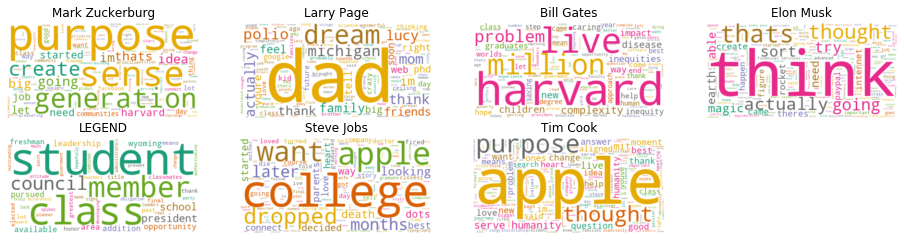

In [39]:
plt.rcParams['figure.figsize']=[16,6]
for index, peep in enumerate(data.columns):
    wc.generate(clean_data.transcript[peep])
    plt.subplot(3,4 , index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])